# Download required library and packages

In [50]:
!pip install scipy tensorflow pillow matplotlib

# Import all the libraries

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os

# Change directory to a specific folder in your Google Drive
os.chdir('/content/drive/My Drive/archive/Rock-Paper-Scissors')

# Print the current working directory
print(os.getcwd())


/content/drive/My Drive/archive/Rock-Paper-Scissors


# Define the paths for training and validation dataset

In [54]:
base_dir = 'Rock-Paper-Scissors' # Root directory

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'validation')

paper_dir = os.path.join(train_dir, 'paper')
rock_dir = os.path.join(train_dir, 'rock')
scissors_dir = os.path.join(train_dir, 'scissors')

paper_imgs = os.listdir(paper_dir)
rock_imgs = os.listdir(rock_dir)
scissors_imgs = os.listdir(scissors_dir)

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2)
validation_datagen=ImageDataGenerator(rescale=1.0/255)
BATCH_SIZE = 32
TARGET_SIZE = 128
# Load training dataset
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(TARGET_SIZE,TARGET_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  shuffle=True,
                                                  class_mode='categorical')
validation_generator=validation_datagen.flow_from_directory(val_dir,
                                                  target_size=(TARGET_SIZE,TARGET_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  shuffle=True,
                                                  class_mode='categorical')
# Load test datset
test_generator=validation_datagen.flow_from_directory(test_dir,
                                                  target_size=(TARGET_SIZE,TARGET_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


# Initialize the batch size, learning rate, epochs, target size

In [55]:
BATCH_SIZE = 32
TARGET_SIZE = 64
EPOCHS = 10
learning_rate = 0.0001

# Showing some sample datset

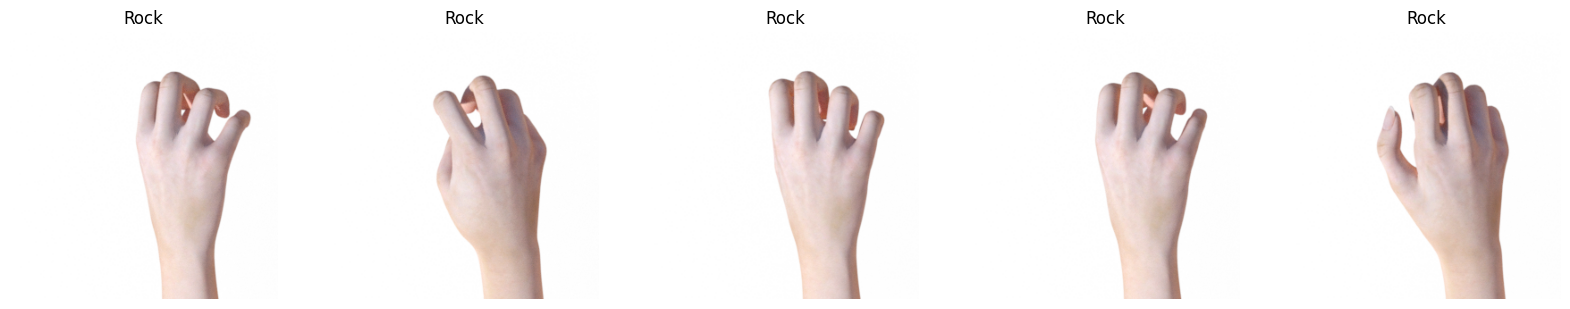

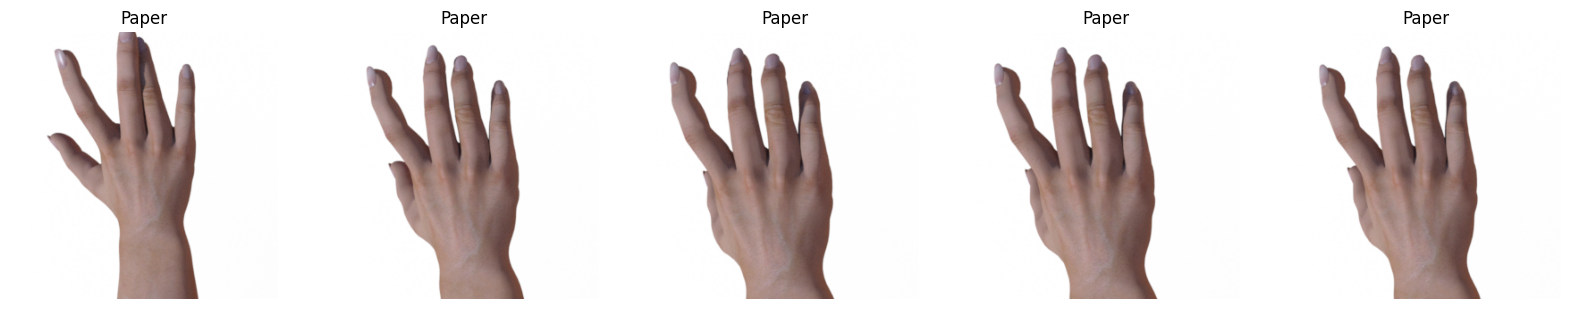

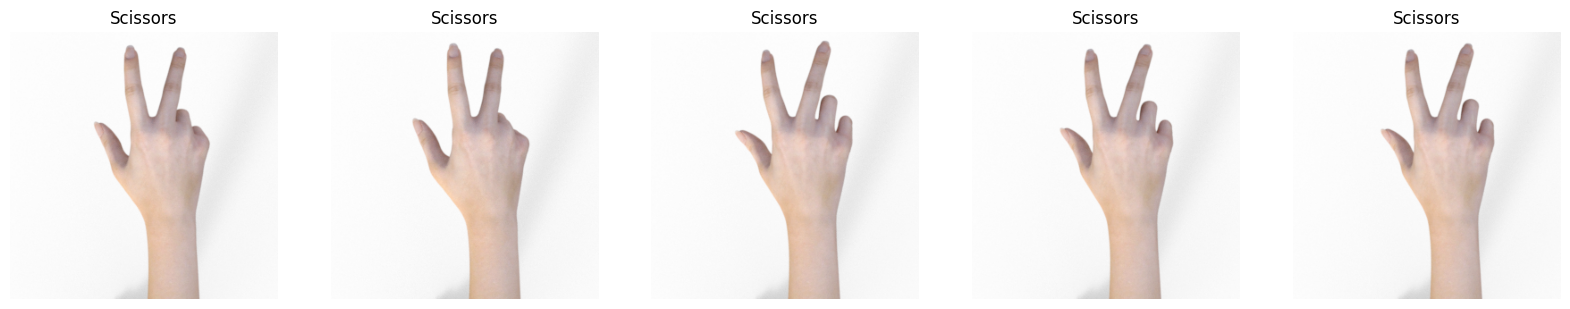

In [56]:
# Function to plot images
def plot_images_from_dir(image_list, class_name, image_dir, num_images=5):
    plt.figure(figsize=(20, 4))
    for i, img_name in enumerate(image_list[:num_images]):
        sp = plt.subplot(1, num_images, i+1)
        img = mpimg.imread(os.path.join(image_dir, img_name))
        plt.imshow(img)
        plt.title(class_name)  # Display the class name (e.g., Rock, Paper, Scissors)
        plt.axis('off')  # Hide axes
    plt.show()


# Displaying sample images for each class
plot_images_from_dir(rock_imgs, 'Rock', rock_dir)
plot_images_from_dir(paper_imgs, 'Paper', paper_dir)
plot_images_from_dir(scissors_imgs, 'Scissors', scissors_dir)

# Developing Model architecture

In [57]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
import tensorflow.keras.optimizers as optimizers


model = models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))


optimizer = optimizers.Adam(0.0001)


# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │             387 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,375 (653.81 KB)

 Trainable params: 167,375 (653.81 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

# Save the model

In [58]:
model.save("model.h5")

# Testing